## PROJECT: OKCUPID: DATE-A-SCIENTIST

This project is part of Codecademy Data Science career path. 

In this project, I aim to apply different techniques to build several supervised classification models using some common ML algorithms such as `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier` and `LogisticRegression` to predict users' sexuality (M or F).

In [1]:
## import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.options.display.max_columns = 31

### Load the dataset and take a first glance

In [2]:
## load the data
profiles = pd.read_csv('profiles.csv')

In [3]:
profiles.shape

(59946, 31)

This dataset contains 59946 records and 31 columns.

In [4]:
profiles.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

#### Variables Info:
Numerical and categorical variables seem to be of correct data type except for `last_online`, which should be formatted as `datetime` object. However, this feature is seemingly not useful for any of our models, so it can be dropped without much investigation.

In [5]:
profiles.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343,54266,59943.000000,59946.000000,51748,59946,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,49260,48963,43603,45554,39324,45443,217,NaN,NaN,21,30123,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,ask me,ask me,my future,out with friends,ask me,you want to.,white,NaN,NaN,other,2012-06-29-22-56,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,16,6,161,89,45,199,32831,NaN,NaN,7589,24,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,20033.222534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,97346.192104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quick look at the values:
1. Numerical variables:
     - The average age is around 32 while the median age is 30, whichs means the distribution of age is left-skewed. Also, the highest age is 110, which might be not the real age. We would figure out what to do with this later.
     - The average height is around 68 inches and the median height is 68 inches. This indicates that `height` has a normal distribution. However, there are outliers of 1 inch, which doesn't make any sense. This might be because the users didn't reveal their height. These values will be replaced with `np.nan` later on.
     - There is an unsual value (-1.00000000) in the `income` column. This is probably because the users didn't reveal their income. Thus, these values should be replaced with `np.nan`.
2. Categorical variables:
     - The data is quite messy; similar values are recorded in many different ways.

### Clean the data

In [6]:
## create a list of categorical columns
cat_cols = profiles.select_dtypes(exclude=np.number).columns.tolist()
profiles[cat_cols].head(2)

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


`education` and `sign` are the columns where values are recorded inconsistently. Since these are all distinctly different, I will have to work on every single one of them. Now take a look at the unique values in each column.

In [7]:
## create a list of words/phrases to be replaced
words_to_replace = ['working on', 'graduated from']

## replace words with an empty string
for word in words_to_replace:
    profiles.education = profiles.education.str.replace(word, '').str.strip()

## get the first word in the each string      
profiles.sign = profiles.sign.str.split().str.get(0)

In [8]:
num_cols = profiles.select_dtypes(np.number).columns.tolist()
profiles[num_cols].describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [9]:
## replace income's -1.000000 with np.nan
profiles.income = profiles.income.replace(-1, np.nan)

#### Missing values

In [10]:
null_df = profiles.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'feature', 0:'count'})
null_df['percentage'] = null_df.apply(lambda row: row['count']/len(profiles), axis=1)
null_df

,feature,count,percentage
0,income,48442,0.808094
1,offspring,35561,0.593217
2,diet,24395,0.406950
3,religion,20226,0.337404
4,pets,19921,0.332316
5,essay8,19225,0.320705
6,drugs,14080,0.234878
7,essay6,13771,0.229723
8,essay9,12603,0.210239
9,essay7,12451,0.207704


#### Observations:
1. There are 18 features where missing values account for more than 10%.  `income` is the column with the most missing values (80%), followed by `offspring`, `diet`, `religion` and `pet` (59%, 40%, 33.7% and 33.2% respectively).
2. Our target variable doesn't have any missing values. 
3. Since we will not use the `essayX` or `last_online` columns, I decide to drop them all. Also, as our models will not work if there're too many missing values, I decide to drop the columns whose missing values percentage is higher than 20%. 
4. As for the other columns, I decided to fill them with their corresponding most frequent values or their corresponding median values.

In [11]:
## drop unnecessary columns and columns whose missing values percentage higher than 20%
cols_to_drop = profiles.filter(regex='essay.|last_online|income|offspring|diet|religion|pet').columns.tolist()
new_profiles = profiles.drop(cols_to_drop, axis=1)

## create two list of numerical columns and categorical columns
num_cols = new_profiles.select_dtypes(np.number).columns.tolist()
cat_cols = new_profiles.select_dtypes(exclude=np.number).columns.tolist()

## fill new_profiles np.nan with meaningful values
new_profiles[num_cols] = new_profiles[num_cols].apply(lambda x: x.fillna(x.median()))
new_profiles[cat_cols] = new_profiles[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [12]:
## check if there're still Null values
new_profiles.isna().sum().sort_values(ascending=False)

age            0
body_type      0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
job            0
location       0
orientation    0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64

### Explore the data

#### Target variable

m    0.597688
f    0.402312
Name: sex, dtype: float64


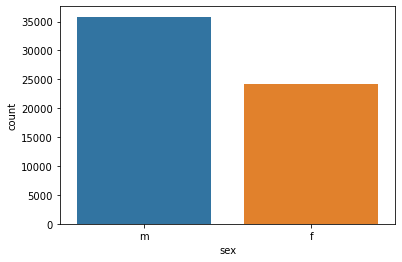

In [13]:
print(new_profiles.sex.value_counts(normalize=True))
## plot a bar chart for target variable
sns.countplot(data=new_profiles, x='sex')
plt.show()

The proportion of female users in this dataset is around 40%, which means that there is some skew in the female class compared to the male class. Yet, here we only have a mild case of imbalanced data. We can overcome this by employing some SMOTE techniques.

#### Numerical features

As discovered in the begining, there are outliers and skewness to our numerical features. Here we will take a closer look by plotting their histograms.

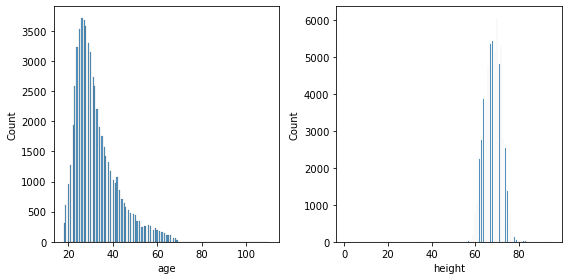

In [14]:
## plot histograms for age, height 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data=new_profiles, x='age')
plt.subplot(1,2,2)
sns.histplot(data=new_profiles, x='height')
plt.tight_layout()

In [15]:
pd.DataFrame(
    {'Skewness':[new_profiles.age.skew(), new_profiles.height.skew()],
     'Kurtosis':[new_profiles.age.kurtosis(), new_profiles.height.kurtosis()]}, index=['Age', 'Height'])

,Skewness,Kurtosis
Age,1.265773,1.572518
Height,-0.463061,7.761588


- As stated before, the distribution of age is slightly left-skewed. Applying log transformation on this feature might help. 
- The distribution of height looks quite normal. However, there are some outliers ranging from 1 to 40 and over 90, which would affect our models prediction ability. To solve this problem, I will just exclude from the dataset. 

In [16]:
## exclude rows where height is lower than 40 
new_profiles = new_profiles.loc[(new_profiles.height > 50) & (new_profiles.height < 90) ]

## perform log transformation on age
new_profiles.age = np.log(new_profiles.age)

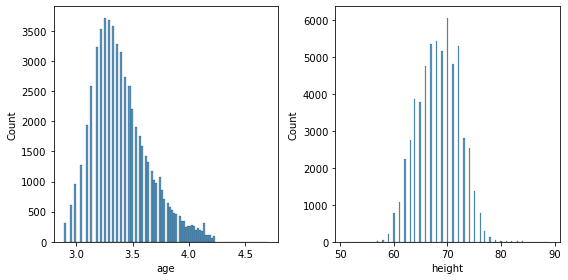

In [17]:
## plot histograms for age, height 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data=new_profiles, x='age')
plt.subplot(1,2,2)
sns.histplot(data=new_profiles, x='height')
plt.tight_layout()

In [18]:
pd.DataFrame(
    {'Skewness':[new_profiles.age.skew(), new_profiles.height.skew()],
     'Kurtosis':[new_profiles.age.kurtosis(), new_profiles.height.kurtosis()]}, index=['Age', 'Height'])

,Skewness,Kurtosis
Age,0.587702,-0.058120
Height,-0.047944,-0.347583


#### Categorical variales

In [19]:
new_profiles[cat_cols].head()

,body_type,drinks,drugs,education,ethnicity,job,location,orientation,sex,sign,smokes,speaks,status
0,a little extra,socially,never,college/university,"asian, white",transportation,"south san francisco, california",straight,m,gemini,sometimes,english,single
1,average,often,sometimes,space camp,white,hospitality / travel,"oakland, california",straight,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,thin,socially,never,masters program,white,other,"san francisco, california",straight,m,pisces,no,"english, french, c++",available
3,thin,socially,never,college/university,white,student,"berkeley, california",straight,m,pisces,no,"english, german (poorly)",single
4,athletic,socially,never,college/university,"asian, black, other",artistic / musical / writer,"san francisco, california",straight,m,aquarius,no,english,single


##### Body type

<AxesSubplot:ylabel='body_type'>

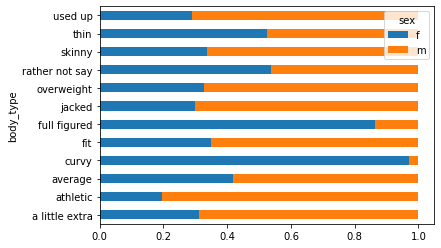

In [20]:
table=pd.crosstab(new_profiles.body_type,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Body Type` seems to be a good predictor for the target variable.

##### Drinks

<AxesSubplot:ylabel='drinks'>

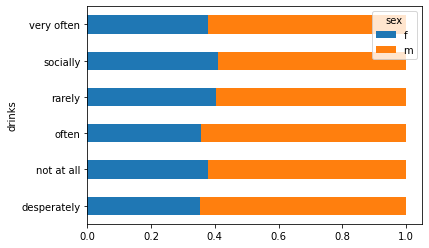

In [21]:
table=pd.crosstab(new_profiles.drinks,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Drinking habit` doesn't seem to be a good predictor for the target variable.

##### Drugs

<AxesSubplot:ylabel='drugs'>

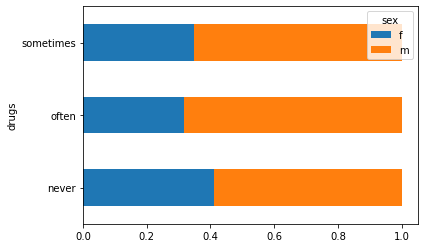

In [22]:
table=pd.crosstab(new_profiles.drugs,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Drugs` doesn't seem to be a good predictor for the target variable.

##### Education

<AxesSubplot:ylabel='education'>

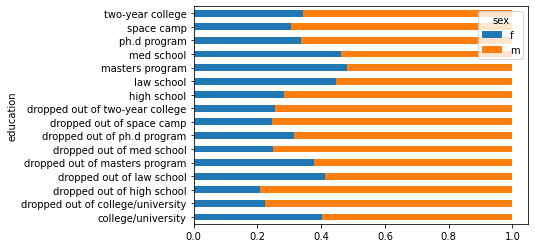

In [23]:
table=pd.crosstab(new_profiles.education,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Education` might be a good predictor for our target variable.

##### Ethnicity

<AxesSubplot:ylabel='ethnicity'>

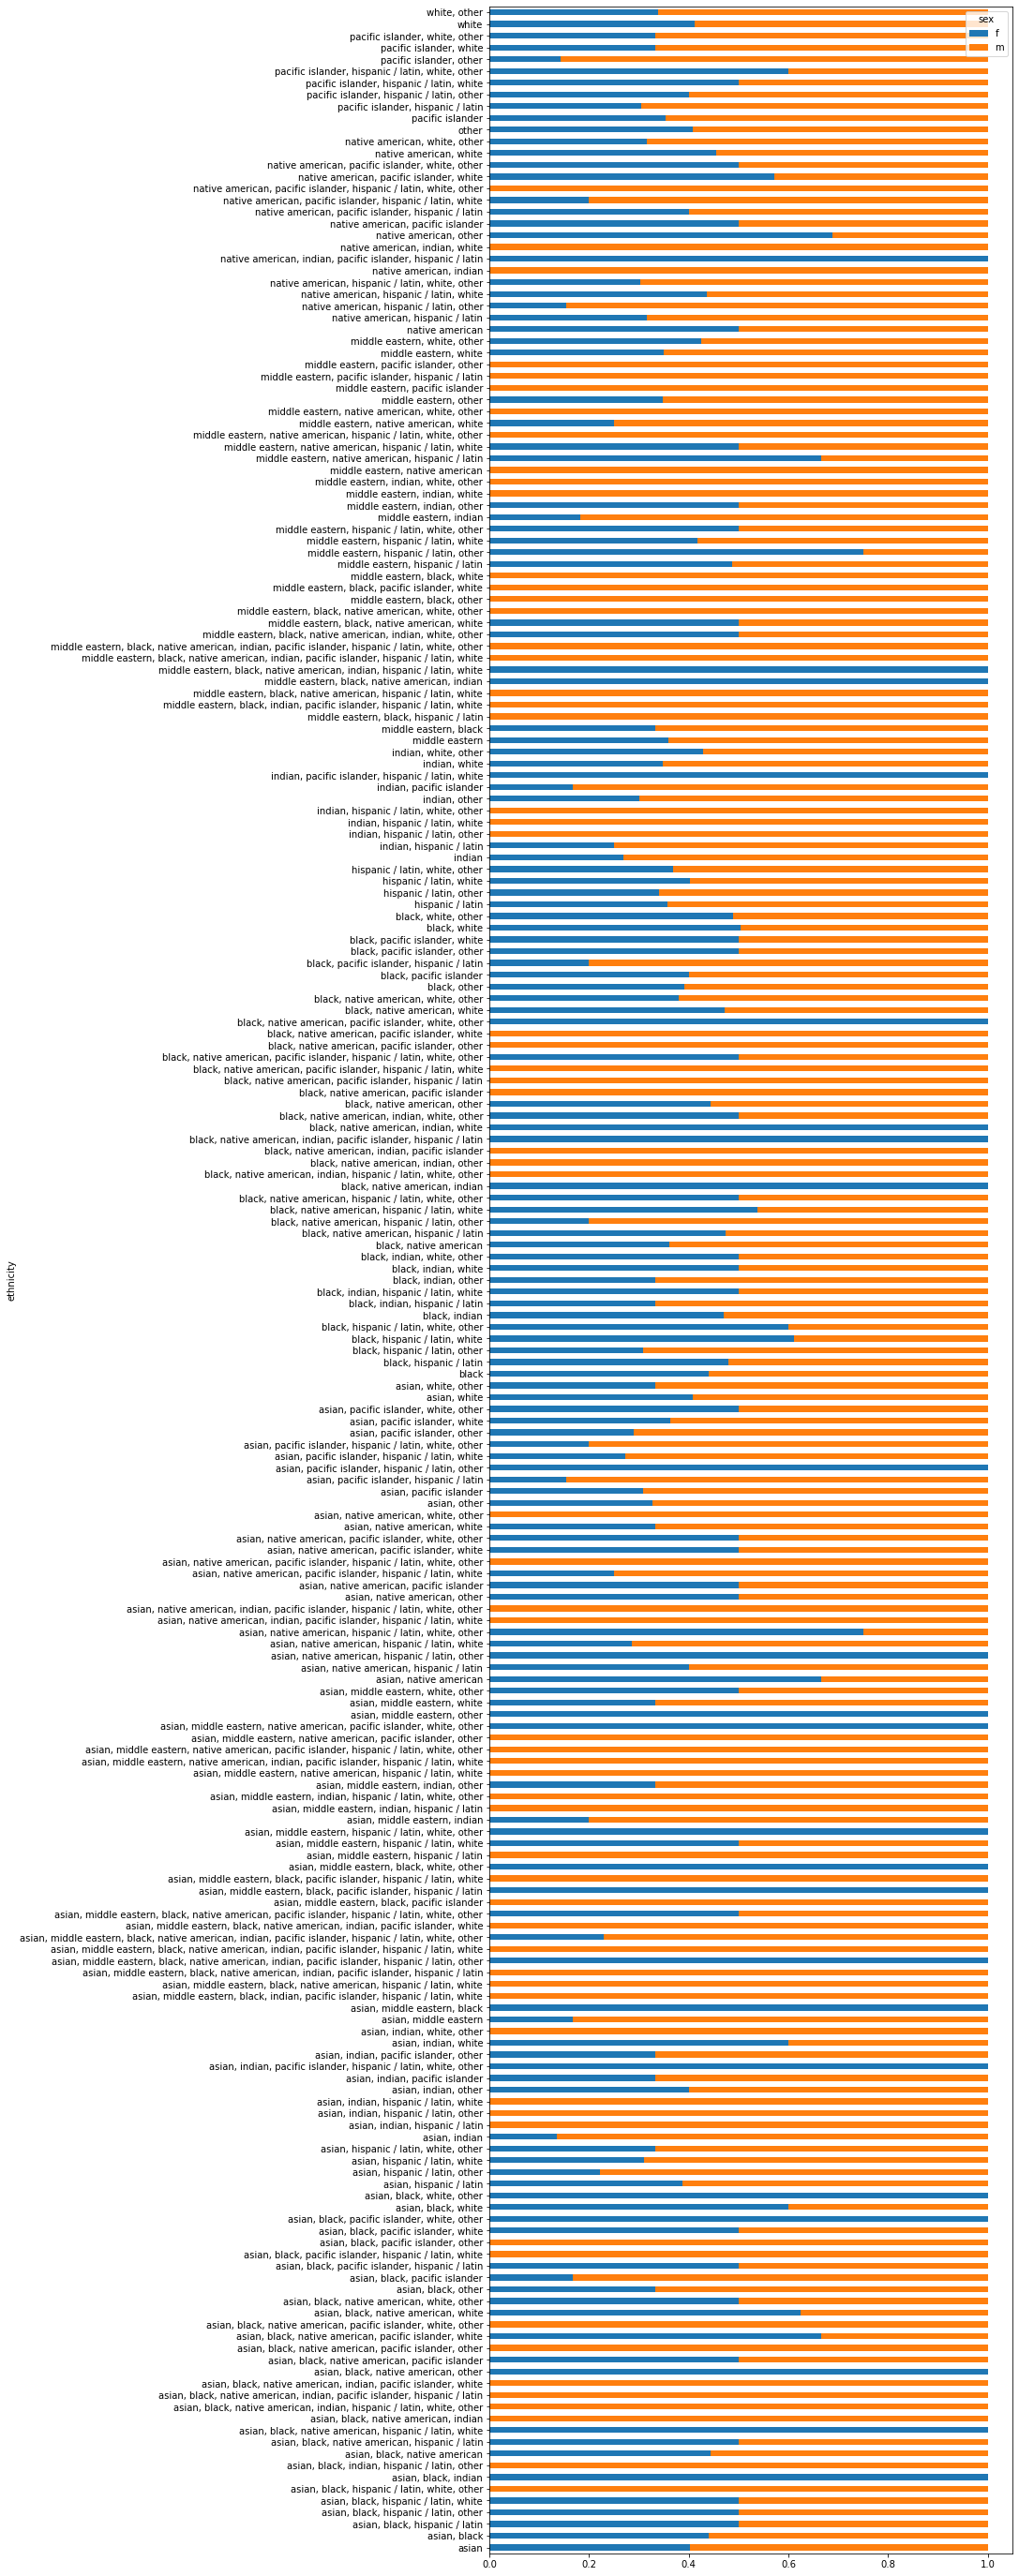

In [24]:
table=pd.crosstab(new_profiles.ethnicity,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, figsize=(10,50))

`Ethnicity` might be a good predictor for our target variable.

##### Job

<AxesSubplot:ylabel='job'>

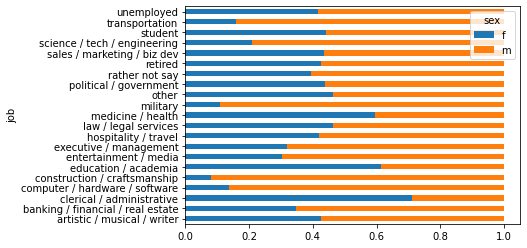

In [25]:
table=pd.crosstab(new_profiles.job,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Job` might be a good predictor for our target variable.

##### Orientation

<AxesSubplot:ylabel='orientation'>

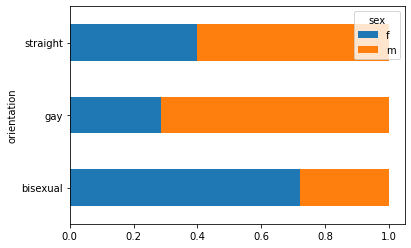

In [26]:
table=pd.crosstab(new_profiles.orientation,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Sexual Orientation` might be a good predictor for our target variable.

##### Smokes

<AxesSubplot:ylabel='smokes'>

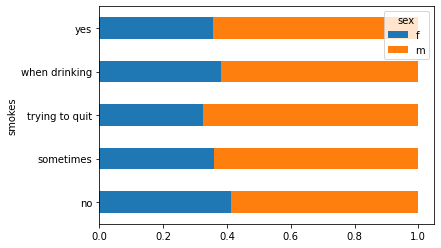

In [27]:
table=pd.crosstab(new_profiles.smokes,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Smoking habit` doesn't seem to be a good predictor for our target variable.

##### Status

<AxesSubplot:ylabel='status'>

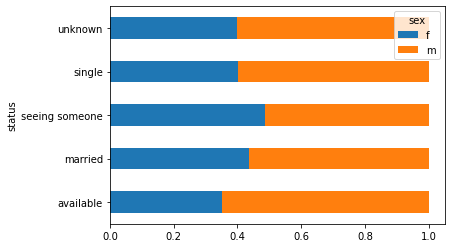

In [28]:
table=pd.crosstab(new_profiles.status,new_profiles.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)

`Status` doesn't seem to be a good predictor for our target variable.

### Encode categorical variables and target variable

In [29]:
## import encoding libraries
from sklearn.preprocessing import LabelEncoder

In [30]:
## encode categorical variables
encoder = LabelEncoder()
for column in cat_cols:
    new_profiles[f'{column}_code'] = encoder.fit_transform(new_profiles[column])

In [31]:
## map target variables
new_profiles.sex = new_profiles.sex.map({'m':0, 'f':1})

### Build classification models

In [105]:
## import essential libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC, SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [33]:
X = new_profiles.filter(
    ['age', 'height', 'body_type_code', 'education_code', 'ethnicity_code', 'job_code', 'orientation_code'])
y = new_profiles.sex

Since the data is imbalanced, I will add the parameter `stratify` when using train_test_split. This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [96]:
## split data into traning set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#### Find the best parameters using GridSearchCV
`GridSearchCV` helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [35]:
## create a list to store models
estimators = []

## control how data is splitted
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

#### Logistic Regression

In [36]:
params = {
    'C': range(1,20),
    'max_iter':[1000]
}

log_reg = LogisticRegression()
clf_log = GridSearchCV(log_reg, param_grid=params, scoring='f1', cv=cv)
clf_log.fit(X_train, y_train)

print(f'Best parameters: {clf_log.best_params_}')
print(f'Best score: {clf_log.best_score_}')

estimators.append(['Log', clf_log.best_estimator_])

Best parameters: {'C': 17, 'max_iter': 1000}
Best score: 0.8050033617804383


#### KNeighbors

In [37]:
params = {
    'n_neighbors': range(1,10),
}

kneighbors = KNeighborsClassifier()
clf_kneighbors = GridSearchCV(kneighbors, param_grid=params, scoring='f1', cv=cv)
clf_kneighbors.fit(X_train, y_train)

print(f'Best parameters: {clf_kneighbors.best_params_}')
print(f'Best score: {clf_kneighbors.best_score_}')

estimators.append(['KNeighbors', clf_kneighbors.best_estimator_])

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9}
Best score: 0.8157551354279248


#### Decision Tree

In [38]:
params = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 15)
}

dtree = DecisionTreeClassifier()
clf_dtree = GridSearchCV(dtree, param_grid=params, scoring='f1', cv=cv)
clf_dtree.fit(X_train, y_train)

print(f'Best parameters: {clf_dtree.best_params_}')
print(f'Best score: {clf_dtree.best_score_}')

estimators.append(['Decision Tree', clf_dtree.best_estimator_])

Best parameters: {'criterion': 'entropy', 'max_depth': 9}
Best score: 0.8215032666404686


#### Random Forest 

In [39]:
params = {
    'n_estimators': [100, 200],
    'criterion':['gini','entropy'],
    'max_depth': [10, 30, 50],
    'max_features': [2, 3],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5]
}

rf = RandomForestClassifier()
clf_rf = GridSearchCV(rf, param_grid=params, scoring='f1', cv=cv)
clf_rf.fit(X_train, y_train)

print(f'Best parameters: {clf_rf.best_params_}')
print(f'Best score: {clf_rf.best_score_}')

estimators.append(['Random Forest', clf_rf.best_estimator_])

Best parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best score: 0.8406031241274207


#### Compare the models

In [50]:
## perform cross validation using `cross_val_score`
scores_df = {'Model':[], 'Accuracy':[]}
for name, model in estimators:
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    scores_df['Model'].append(name)
    scores_df['Accuracy'].append(accuracies.mean())

scores_df = pd.DataFrame(scores_df)
scores_df

,Model,Accuracy
0,Log,0.846170
1,KNeighbors,0.855027
2,Decision Tree,0.857949
3,Random Forest,0.873290


Based the results from cross validation, Random Forest is the best model.

In [52]:
## fit the training data to RandomForest model
clf_final = estimators[3][1]
clf_final.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=2,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200)

In [91]:
## evaluate the model
scores = classification_report(y_test, clf_final.predict(X_test))
print(scores)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7094
           1       0.85      0.83      0.84      4884

    accuracy                           0.87     11978
   macro avg       0.87      0.87      0.87     11978
weighted avg       0.87      0.87      0.87     11978



Text(83.40000000000006, 0.5, 'Actual')

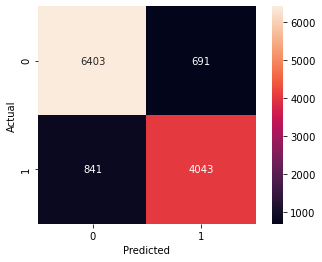

In [88]:
table = confusion_matrix(y_test, clf_final.predict(X_test))

## plot a heatmap 
sns.heatmap(table, xticklabels=True, yticklabels=True,
            annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Randorm Forest with SMOTENC

In [110]:
## create a SMOTENC object
smote = SMOTENC(categorical_features=[2,3,4,5,6], random_state=42)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [111]:
## fit oversampled data to RandomForest model
clf_final2 = estimators[3][1]
clf_final2.fit(X_oversample, y_oversample)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=2,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200)

In [112]:
## evaluate the model
scores2 = classification_report(y_test, clf_final2.predict(X_test))
print(scores2)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7094
           1       0.83      0.86      0.84      4884

    accuracy                           0.87     11978
   macro avg       0.86      0.87      0.87     11978
weighted avg       0.87      0.87      0.87     11978



Text(83.40000000000006, 0.5, 'Actual')

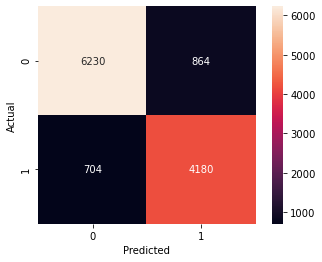

In [113]:
table2 = confusion_matrix(y_test, clf_final2.predict(X_test))

## plot a heatmap 
sns.heatmap(table2, xticklabels=True, yticklabels=True,
            annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In conclusion, the oversampled data don't improve our `RandomForest` model for prediction purposes.